In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Here the first dataset is put into a dataframe named **players**. The unwanted columns are removed, and the codes for the top 5 european leagues are replaced with the names of the leagues.

In [2]:
players = pd.read_csv("players.csv")

players["market_value_in_eur"] = players["market_value_in_eur"] / 1000000 # the market values are converted to millions

players["highest_market_value_in_eur"] = players["highest_market_value_in_eur"] / 1000000

code_replacement = {"GB1": "Premier League", "ES1": "La Liga", "IT1": "Serie A", "L1": "Bundesliga", "FR1": "Ligue 1"}

club_name_replacement = {"Manchester City Football Club": "Manchester City", "Paris Saint-Germain Football Club":\
                         "PSG", "Arsenal Football Club": "Arsenal", "Real Madrid Club de Fútbol": "Real Madrid",\
                         "Chelsea Football Club": "Chelsea", "FC Bayern München": "Bayern München",\
                         "Liverpool Football Club": "Liverpool", "Futbol Club Barcelona": "Barcelona",\
                         "Manchester United Football Club": "Manchester United", "Tottenham Hotspur Football Club":\
                        "Tottenham"} # replace long names for top clubs with shorter versions

players["current_club_domestic_competition_id"] =\
players["current_club_domestic_competition_id"].replace(code_replacement)


players["current_club_name"] =\
players["current_club_name"].replace(club_name_replacement)

players_filtered = players[["last_name", "last_season", "country_of_citizenship", "position", "sub_position",\
                            "height_in_cm", "current_club_name", "current_club_domestic_competition_id",\
                            "market_value_in_eur", "highest_market_value_in_eur"]]

players_filtered.head()

,last_name,last_season,country_of_citizenship,position,sub_position,height_in_cm,current_club_name,current_club_domestic_competition_id,market_value_in_eur,highest_market_value_in_eur
0,Klose,2015,Germany,Attack,Centre-Forward,184.0,Società Sportiva Lazio S.p.A.,Serie A,1.00,30.0
1,Weidenfeller,2017,Germany,Goalkeeper,Goalkeeper,190.0,Borussia Dortmund,Bundesliga,0.75,8.0
2,Berbatov,2015,Bulgaria,Attack,Centre-Forward,NaN,Panthessalonikios Athlitikos Omilos Konstantin...,GR1,1.00,34.5
3,Lúcio,2012,Brazil,Defender,Centre-Back,NaN,Juventus Football Club,Serie A,0.20,24.5
4,Starke,2017,Germany,Goalkeeper,Goalkeeper,194.0,Bayern München,Bundesliga,0.10,3.0


The second dataset is put into a dataframe named **market2023**. The values in the **cost** and **player_value** columns are cleaned and converted to numeric values (into millions).

In [3]:
market2023 = pd.read_csv("Summer23_FootballTransfers.csv")
market2023 = market2023.rename(columns={"player_valuje": "player_value"})
# correction of typo in the "player_value" column name

cost_string = market2023["cost"].str.extract("€(\d*\.\d+|\d+)([km])") # regular expression matches characters of
# the form "€1.5m"
cost_string[0] = pd.to_numeric(cost_string[0], errors = "coerce") # convert first part of the string to numeric data
cost_string[1] = cost_string[1].map({"k": 0.001, "m": 1}) # second part of the string: convert k to 0.001 and m to 1
market2023["cost"] = cost_string[0] * cost_string[1] # put cleaned data back in the original dataframe
market2023["cost"] = market2023["cost"].fillna(0.0) # values with forms other than €1.5m are replaced with zero

player_value_string = market2023["player_value"].str.extract("€(\d*\.\d+|\d+)([km])")
player_value_string[0] = pd.to_numeric(player_value_string[0], errors = "coerce")
player_value_string[1] = player_value_string[1].map({"k": 0.001, "m": 1}).fillna(0.0)
market2023["player_value"] = player_value_string[0] * player_value_string[1]
market2023["player_value"] = market2023["player_value"].fillna(0.0)

market2023.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_value,cost,date_of_transfer
0,Filippo Melegoni,Central Midfield,24.0,Genoa CFC,Serie A,Italy,AC Reggiana 1919,Serie B,Italy,1.50,0.20,2023-09-01
1,Pier Luigi Simonetti,Central Midfield,22.0,US Ancona,Serie C - B,Italy,Benevento Calcio,Serie C - C,Italy,0.30,0.20,2023-09-01
2,Andrea Astrologo,Defensive Midfield,21.0,Vis Pesaro 1898,Serie C - B,Italy,SSC Bari,Serie B,Italy,0.10,0.10,2023-09-01
3,Michael Martin,Central Midfield,23.0,SV Ried,2. Liga,Austria,SC Paderborn 07,2. Bundesliga,Germany,0.40,0.08,2023-09-01
4,Valeriy Dubko,Centre-Back,22.0,FCV Dender EH,Challenger Pro League,Belgium,FK Obolon Kyiv,Premier Liga,Ukraine,0.15,0.08,2023-09-01


The third dataset is put into a dataframe named **stats**. This dataframe is then joined with the **players** dataframe based on the player's name column in each dataframe. The join type is set to "inner" to display only rows where the names in both dataframes match.

In [4]:
stats = pd.read_csv("2022-2023 Football Player Stats.csv", delimiter=';')

In [5]:
stats_players_merge = pd.merge(stats, players, left_on = "Player", right_on = "name", how = "inner")

stats_players_merge.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,right,177.0,2024-06-30 00:00:00,Wasserman,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/brenden-aarons...,Bundesliga,1. FC Union Berlin,14.0,30.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,left,190.0,2024-06-30 00:00:00,PSC,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yunis-abdelham...,Ligue 1,Stade de Reims,0.7,2.5
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,left,185.0,2026-06-30 00:00:00,CNS,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/himad-abdelli/...,Ligue 1,Angers SCO,3.0,3.0
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,right,179.0,2028-06-30 00:00:00,BLACKSKILL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/salis-abdul-sa...,Ligue 1,Racing Club de Lens,18.0,18.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,right,170.0,2026-06-30 00:00:00,N.Agency,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/laurent-aberge...,Ligue 1,Football Club Lorient-Bretagne Sud,3.0,3.0


A pandas Series of the sum of the market values of players for each **country** is created, and this is then sorted in descending order and used to select the top 10 countries with the greatest market values.

In [6]:
total_player_value_by_country = players.groupby("country_of_citizenship")["market_value_in_eur"].sum()

top_10_total_player_value_by_country = total_player_value_by_country.sort_values(ascending=False).head(10)

top_10_total_player_value_by_country

country_of_citizenship
England        4447.935
France         4241.980
Spain          3709.040
Brazil         3404.140
Germany        2350.440
Italy          2166.570
Portugal       2160.445
Netherlands    2028.175
Argentina      1646.245
Belgium        1332.945
Name: market_value_in_eur, dtype: float64

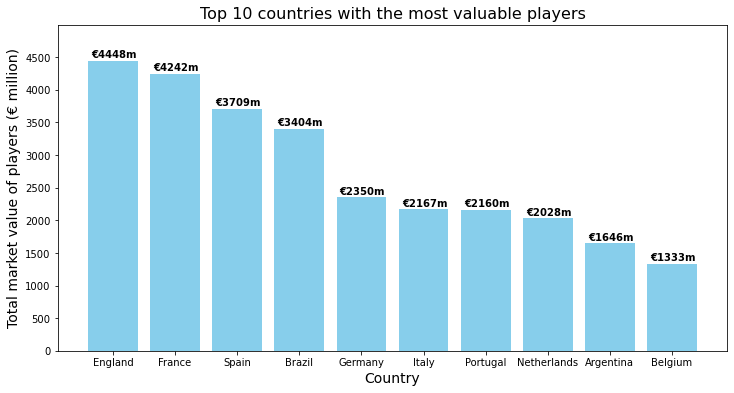

In [7]:
countries = top_10_total_player_value_by_country.index
total_player_value = top_10_total_player_value_by_country.values

plt.figure(figsize=(12, 6))
bars = plt.bar(countries, total_player_value, color="skyblue")
plt.title("Top 10 countries with the most valuable players", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total market value of players (€ million)", fontsize=14)
plt.yticks(range(0,5000,500))
plt.ylim([0,5000])


for bar, value in zip(bars, total_player_value):
    plt.text(bar.get_x()+0.05, bar.get_height()+50, f"€{value:.0f}m", fontsize=10, color="black", fontweight="bold")

In [8]:
total_player_value_by_club = players.groupby("current_club_name")["market_value_in_eur"].sum()

top_10_total_player_value_by_club = total_player_value_by_club.sort_values(ascending=False).head(10)

top_10_total_player_value_by_club

current_club_name
Manchester City      1369.875
PSG                  1187.700
Arsenal              1150.375
Real Madrid          1080.225
Chelsea              1059.325
Bayern München        996.075
Liverpool             968.125
Barcelona             945.125
Manchester United     849.850
Tottenham             801.700
Name: market_value_in_eur, dtype: float64

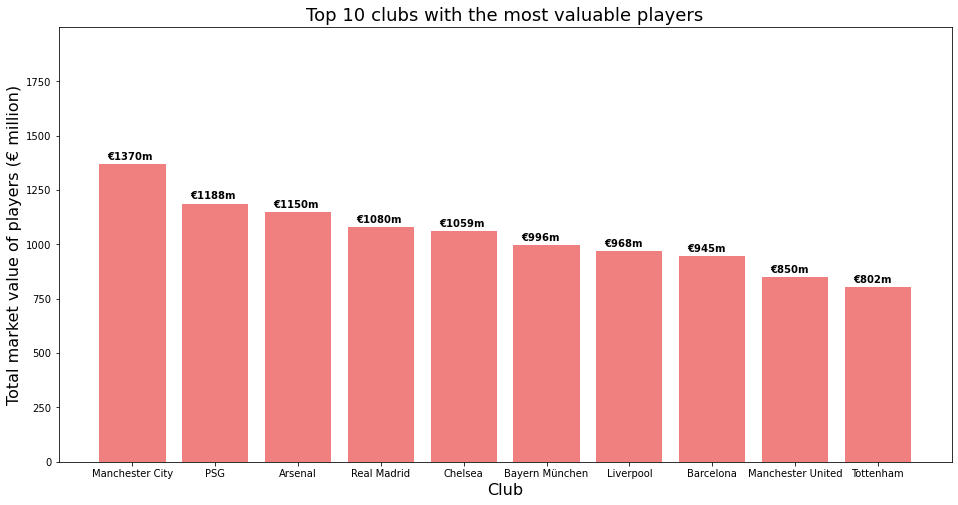

In [9]:
clubs = top_10_total_player_value_by_club.index
total_player_value = top_10_total_player_value_by_club.values

plt.figure(figsize=(16, 8))
bars = plt.bar(clubs, total_player_value, color="lightcoral")
plt.title("Top 10 clubs with the most valuable players", fontsize=18)
plt.xlabel("Club", fontsize=16)
plt.ylabel("Total market value of players (€ million)", fontsize=16)
plt.yticks(range(0,2000,250))
plt.ylim([0,2000])

for bar, value in zip(bars, total_player_value):
    plt.text(bar.get_x()+0.1, bar.get_height() + 20, f"€{value:.0f}m",fontsize=10, color="black", fontweight="bold")


Two pandas Series' of the amount of money received and spent on transfer fees for each league in the summer market of 2023 are created in the two code blocks below. They are sorted and the top leagues are selected.

In [10]:
league_revenue = market2023.groupby("league_origin_club")["cost"].sum()

top_10_league_revenue = league_revenue.sort_values(ascending=False).head(10)

top_10_league_revenue

league_origin_club
Premier League        1297.084
Bundesliga             999.510
Serie A                975.221
Ligue 1                853.150
LaLiga                 524.800
Championship           506.698
Eredivisie             303.818
Liga Portugal          277.430
Jupiler Pro League     183.400
Copa de la Liga        156.677
Name: cost, dtype: float64

In [11]:
league_spending = market2023.groupby("league_new_club")["cost"].sum()

top_6_league_spending = league_spending.sort_values(ascending=False).head(6)

top_6_league_spending

league_new_club
Premier League      2482.549
Serie A              856.730
Saudi Pro League     851.509
Ligue 1              784.840
Bundesliga           768.305
LaLiga               404.850
Name: cost, dtype: float64

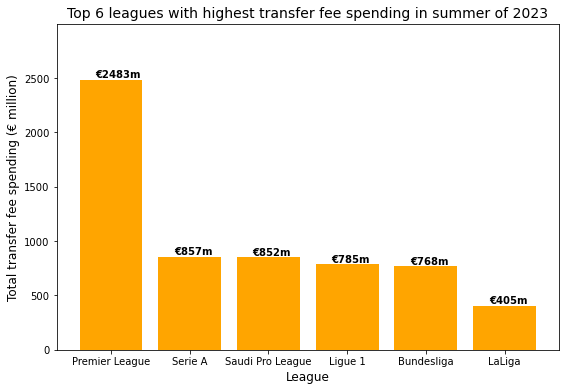

In [12]:
leagues = top_6_league_spending.index
total_spending = top_6_league_spending.values

plt.figure(figsize=(9, 6))
bars = plt.bar(leagues, total_spending, color="orange")
plt.title("Top 6 leagues with highest transfer fee spending in summer of 2023", fontsize=14)
plt.xlabel("League", fontsize=12)
plt.ylabel("Total transfer fee spending (€ million)", fontsize=12)
plt.yticks(range(0,3000,500))
plt.ylim([0,3000])


for bar, value in zip(bars, total_spending):
    plt.text(bar.get_x()+0.2, bar.get_height() + 20, f"€{value:.0f}m",fontsize=10, color="black", fontweight="bold")

A dataframe **net_spend_df** is created and it contains the net transfer fee spending by each league. This is then filtered to select only certain leagues which were the highest in either the revenue generated or the total spending during the 2023 market.

In [13]:
net_spend = league_revenue - league_spending

net_spend_df = net_spend.reset_index()

net_spend_filtered = net_spend_df[(net_spend_df["index"] == "Premier League") | (net_spend_df["index"] == "LaLiga") |\
                                  (net_spend_df["index"] == "Bundesliga") | (net_spend_df["index"] == "Serie A") |\
                                  (net_spend_df["index"] == "Saudi Pro League") |\
                                  (net_spend_df["index"] == "Championship") | (net_spend_df["index"] == "Ligue 1")]

# 7 leagues are selected for visualisation

net_spend_filtered = net_spend_filtered.set_index("index")["cost"]

(-1500.0, 1500.0)

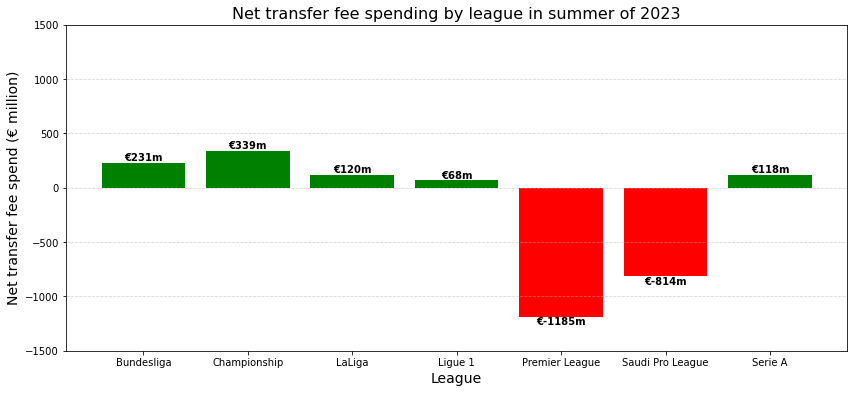

In [14]:
plt.figure(figsize=(14, 6))
plt.bar(net_spend_filtered.index, net_spend_filtered, color=["g" if v >= 0 else "r" for v in net_spend_filtered])
plt.title("Net transfer fee spending by league in summer of 2023", fontsize=16)
plt.xlabel("League", fontsize=14)
plt.ylabel("Net transfer fee spend (€ million)", fontsize=14)

for i, value in enumerate(net_spend_filtered):
    plt.text(i, value, f"€{value:.0f}m", ha="center", va="bottom" if value >= 0 else "top", fontsize=10, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.ylim(-1500, 1500)

Several dataframes are created to select players that fall in certain market value ranges.

In [15]:
players_over_20 = players_filtered[players_filtered["market_value_in_eur"] >= 20]

players_over_50 = players_filtered[players_filtered["market_value_in_eur"] >= 50]

players_over_100 = players_filtered[players_filtered["market_value_in_eur"] >= 100]

players_20_to_50 = players_filtered[(players_filtered["market_value_in_eur"] >= 20) &\
                                    (players_filtered["market_value_in_eur"] < 50)]

players_50_to_100 = players_filtered[(players_filtered["market_value_in_eur"] >= 50) &\
                                     (players_filtered["market_value_in_eur"] < 100)]


Here a pandas Series that contains the count of players worth 20-50 million euros for each position is created. This is then used to select the top 5 positions with highest count in the price range 20-50 million, and the same is repeated for the price range 50-100 million and 100+ million.

In [16]:
count_by_position_20_to_50 = players_20_to_50.groupby("sub_position")["market_value_in_eur"].count()

top_5_count_by_position_20_to_50 = count_by_position_20_to_50.sort_values(ascending=False).head(5)
top_5_count_by_position_20_to_50

sub_position
Centre-Back           81
Central Midfield      65
Centre-Forward        44
Defensive Midfield    37
Right Winger          34
Name: market_value_in_eur, dtype: int64

Text(0, 0.5, 'Count')

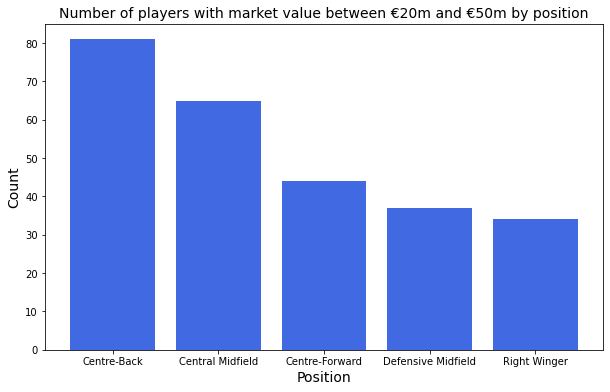

In [17]:
positions = top_5_count_by_position_20_to_50.index
counts = top_5_count_by_position_20_to_50.values

plt.figure(figsize=(10, 6))
plt.bar(positions, counts, color="royalblue")
plt.title("Number of players with market value between €20m and €50m by position", fontsize=14)
plt.xlabel("Position", fontsize=14)
plt.ylabel("Count", fontsize=14)

Text(0, 0.5, 'Count')

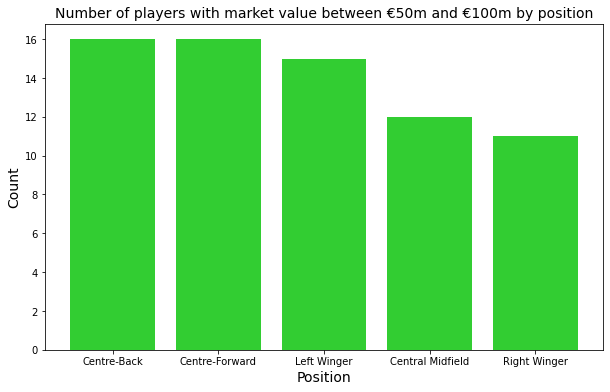

In [18]:
count_by_position_50_to_100 = players_50_to_100.groupby("sub_position")["market_value_in_eur"].count()

top_5_count_by_position_50_to_100 = count_by_position_50_to_100.sort_values(ascending=False).head(5)

positions = top_5_count_by_position_50_to_100.index
counts = top_5_count_by_position_50_to_100.values

plt.figure(figsize=(10, 6))
plt.bar(positions, counts, color="limegreen")
plt.title("Number of players with market value between €50m and €100m by position", fontsize=14)
plt.xlabel("Position", fontsize=14)
plt.ylabel("Count", fontsize=14)

([<matplotlib.axis.YTick at 0x1c730b25b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

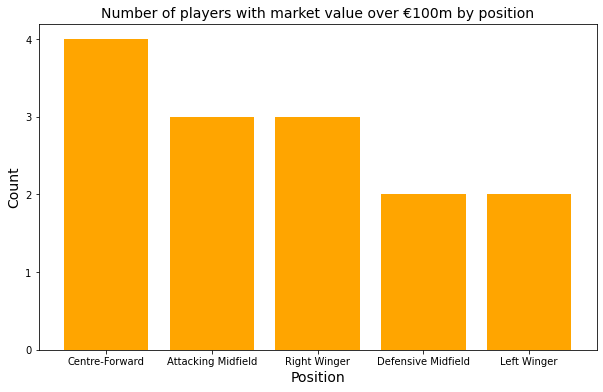

In [19]:
count_by_position_over_100 = players_over_100.groupby("sub_position")["market_value_in_eur"].count()

top_5_count_by_position_over_100 = count_by_position_over_100.sort_values(ascending=False).head(5)

positions = top_5_count_by_position_over_100.index
counts = top_5_count_by_position_over_100.values

plt.figure(figsize=(10, 6))
plt.bar(positions, counts, color="orange")
plt.title("Number of players with market value over €100m by position", fontsize=14)
plt.xlabel("Position", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.yticks([0,1,2,3,4])

Text(0, 0.5, 'Player market value (€ million)')

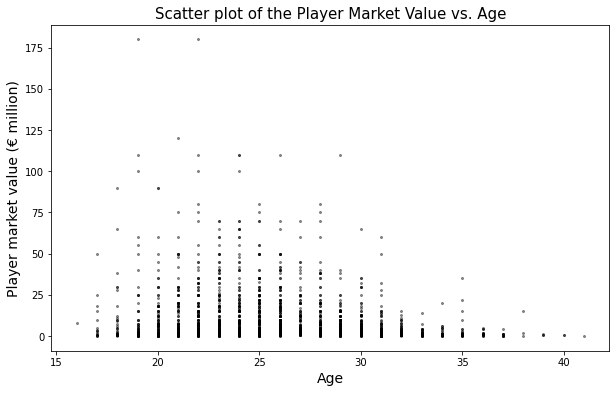

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(stats_players_merge["Age"], stats_players_merge["market_value_in_eur"], s=4, color="black", alpha=0.4)
plt.title("Scatter plot of the Player Market Value vs. Age", fontsize=15)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Player market value (€ million)", fontsize=14)